In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
train, validation, test = mnist

In [86]:
n_inputs = 784
n_hidden = 10
n_outputs = n_inputs

In [87]:
learning_rate = 0.01
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()

/scratch/kabbe/programs/anaconda3/envs/gym/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


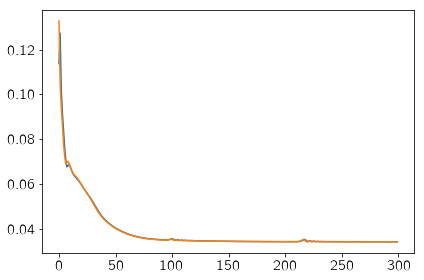

In [89]:
n_iterations = 300
codings = hidden

saver = tf.train.Saver(max_to_keep=5)

train_loss, validation_loss = [], []

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        _, loss = sess.run([training_op, reconstruction_loss], feed_dict={X: train.images})
        validation = sess.run(reconstruction_loss, feed_dict={X: test.images})
        print(f"Iteration {iteration: 3d}: {loss:10f} -- {validation:10f}", end="\r")
        train_loss.append(loss)
        validation_loss.append(validation)
    saver.save(sess, "model.ckpt")
    codings_val = codings.eval(feed_dict={X: test.images})

plt.plot(train_loss)
plt.plot(validation_loss)
plt.show()

In [100]:
with tf.Session() as sess:
    saver.restore(sess, "model.ckpt")
    hidden_weights = tf.trainable_variables()[-4].eval()

INFO:tensorflow:Restoring parameters from model.ckpt


/scratch/kabbe/programs/anaconda3/envs/gym/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


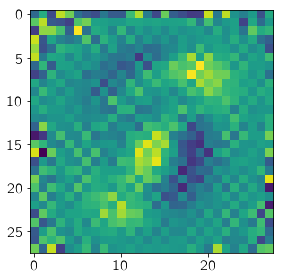

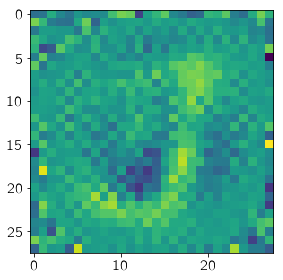

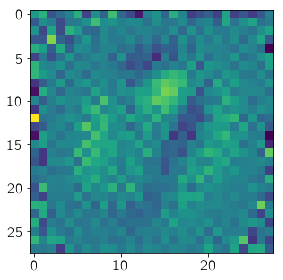

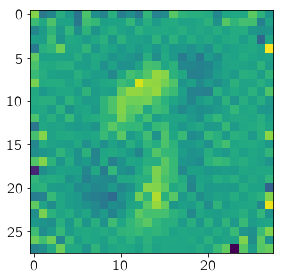

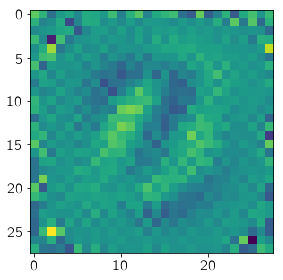

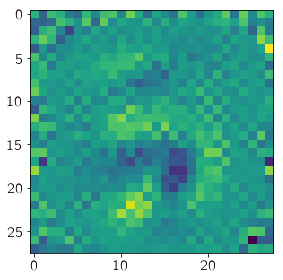

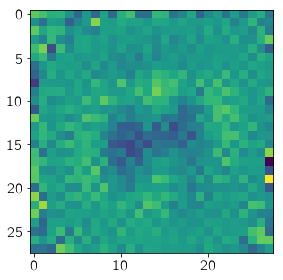

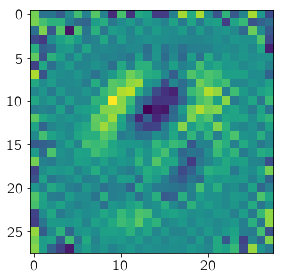

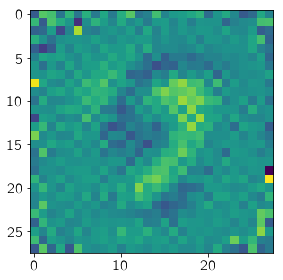

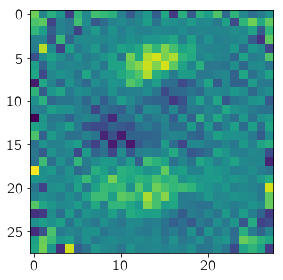

In [101]:
for i in range(hidden_weights.shape[1]):
    plt.imshow(hidden_weights[:, i].reshape((28, 28)))
    plt.show()

In [99]:
print([x.shape for x in tf.trainable_variables()])

[TensorShape([Dimension(784), Dimension(20)]), TensorShape([Dimension(20)]), TensorShape([Dimension(784), Dimension(20)]), TensorShape([Dimension(20)]), TensorShape([Dimension(20), Dimension(784)]), TensorShape([Dimension(784)]), TensorShape([Dimension(784), Dimension(20)]), TensorShape([Dimension(20)]), TensorShape([Dimension(20), Dimension(784)]), TensorShape([Dimension(784)]), TensorShape([Dimension(784), Dimension(10)]), TensorShape([Dimension(10)]), TensorShape([Dimension(10), Dimension(784)]), TensorShape([Dimension(784)])]
